#### ADS 509
#### Assignment 2
#### Abby Tan
#### GitHub Link: https://github.com/Abby-Tan/ADS509_Assignment_3

# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [2]:
# Use this space for any additional import statements you need
from lexical_diversity import lex_div as ld

In [3]:
# Place any addtional functions or constants you need here. 


# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}


# Stopwords
sw = stopwords.words("english")


# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")


# It's handy to have a full set of emojis
all_language_emojis = set()
desc_list = []


for country in desc_list : 
    for em in emoji.is_emoji[country] : 
        all_language_emojis.add(em)

#for country in emoji.UNICODE_EMOJI : 
#    for em in emoji.UNICODE_EMOJI[country] : 
#        all_language_emojis.add(em)


# and now our functions
def descriptive_stats(tokens, tokens_text, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
    # Place your Module 2 solution here
    num_tokens = len(tokens_list)
    num_unique_tokens = len(set(tokens_list))
    num_characters = len(tokens_text)
    lexical_diversity = ld.ttr(tokens_list)
    most_common_5 = Counter(tokens_list).most_common(5)
    if verbose :
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    # print the five most common tokens
        print(f"The five most common tokens are {most_common_5} in the data.") 
        return(0)
    
    
#def is_emoji(s):
#    return(s in all_language_emojis)
def is_emoji(s):
    return(emoji.is_emoji(s))

def contains_emoji(s):
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]
    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(' '.join([tk for tk in tokens.split() if tk not in sw]))
 
    
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))


def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    # modify this function to return tokens
    return([item for item in whitespace_pattern.split(text)])


def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [22]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

 # change to your location if it is not in the same directory as your notebook
data_location = "C:/Users/abby0/OneDrive/Desktop/MSADS/ADS-509 Applied Text Mining/Module 3/"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'joji':'sushitrash_follower_data.txt',
                'postmalone':'PostMalone_follower_data.txt'}


In [23]:
data_location + twitter_folder + artist_files['joji']

'C:/Users/abby0/OneDrive/Desktop/MSADS/ADS-509 Applied Text Mining/Module 3/twitter/sushitrash_follower_data.txt'

In [24]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['joji'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "joji"

In [25]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['postmalone'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "postmalone"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [26]:
twitter_data.head(3)

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hannajosefinn,Josefin,4200500716,NaN,2,53,NaN,joji
1,hh2_mahad,Mahad,4200468694,NaN,1,65,NaN,joji
2,miguelcardz,Miguel,3986238433,"Texas, USA",86,254,🐶🌈🚶🏻‍♀️,joji


In [27]:
# read in the lyrics here
artists = []
songs = []
lyrics = []

artist_folders = os.listdir("lyrics/")
artist_folders = [f for f in artist_folders if os.path.isdir("lyrics/" + f)]

for artist in artist_folders:
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]
    for f_name in artist_files:
        with open("lyrics/" + artist + "/" + f_name) as infile:
            artists.append(artist)
            songs.append(infile.readline())
            lyrics.append(infile.read())

In [28]:
lyrics_data = pd.DataFrame({'artists':artists,
                            'songs' :songs,
                            'lyrics' :lyrics })
lyrics_data['songs'] = lyrics_data['songs'].str.replace('\n', ' ')

In [29]:
lyrics_data.head(3)

,artists,songs,lyrics
0,Joji,amazonian pet,"\nI'm an old man rich, amazonian pet\nRap game..."
1,Joji,attention,"\nGirl, would it kill you just to throw a litt..."
2,Joji,bitter fuck,\nI find it hard to be myself\nI shed my skin ...


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [30]:
# song title removed when importing files

In [31]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, remove_stop, tokenize]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 

In [32]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [33]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
32109,postmalone,thank you for your support🙏🏽 💃,"[thank, support🙏🏽, 💃]"
8034,postmalone,just wanna take it all in ... 👅🍑🍆,"[wanna, take, 👅🍑🍆]"
73968,postmalone,💋x💋o💋x💋o💋,[💋x💋o💋x💋o💋]
39284,postmalone,"🌊🌬⛵🐕Imperfect. Loving honesty, integrity. NO 2...","[🌊🌬⛵🐕imperfect, loving, honesty, integrity, 2,..."
54111,joji,Personal account. Signed up for info & content...,"[personal, account, signed, info, content, 🐈🐱,..."
52979,postmalone,🥺,[🥺]
93082,postmalone,Introverted Taurus who lives in an ununited Un...,"[introverted, taurus, lives, ununited, united,..."
43123,postmalone,Head of Programming @TYT Network ✨World travel...,"[head, programming, tyt, network, ✨world, trav..."
76901,postmalone,"Proud Momma!! Loves JESUS...Daughter, Sister, ...","[proud, momma, loves, jesusdaughter, sister, n..."
22717,joji,✨You're your own sun. Stop wasting your time t...,"[✨youre, sun, stop, wasting, time, trying, orb..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: For the tokenization pipline, one of the improvment that theoretically could have done is seperate the text and emoji into two columns (text only token and emoji only token).

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [34]:
# your code here
def descriptive_stats(tokens_list, verbose=True):
    num_tokens = len(tokens_list)
    num_unique_tokens = len(set(tokens_list))
    num_characters = sum(len(i) for i in tokens_list) # used logic from reference
    lexical_diversity = ld.ttr(tokens_list)
    most_common_5 = Counter(tokens_list).most_common(5)
    
    if verbose :
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    # print the five most common tokens
        print(f"The five most common tokens are {most_common_5} in the data.")
        
# Reference
# https://stackoverflow.com/questions/25934586/finding-the-amount-of-characters-of-all-words-in-a-list-in-python

In [35]:
# postmalone
postmalone_lyrics = lyrics_data[lyrics_data['artists'] == 'PostMalone'][['tokens']]
postmalone_lyrics = postmalone_lyrics['tokens'].tolist()
postmalone_lyrics_list = [j for sub in postmalone_lyrics for j in sub] # used logic from reference

# joji
joji_lyrics = lyrics_data[lyrics_data['artists'] == 'Joji'][['tokens']]
joji_lyrics = joji_lyrics['tokens'].tolist()
joji_lyrics_list = [j for sub in joji_lyrics for j in sub]

# Reference 
# https://www.geeksforgeeks.org/python-ways-to-flatten-a-2d-list/

In [37]:
print('Descriptive statistics for Post Malone lyrics:')
descriptive_stats(postmalone_lyrics_list)
print('\nDescriptive statistics for Joji lyrics:')
descriptive_stats(joji_lyrics_list)

Descriptive statistics for Post Malone lyrics:
There are 4602 tokens in the data.
There are 1083 unique tokens in the data.
There are 21064 characters in the data.
The lexical diversity is 0.235 in the data.
The five most common tokens are [('yeah', 139), ('im', 137), ('know', 86), ('like', 85), ('got', 72)] in the data.

Descriptive statistics for Joji lyrics:
There are 1861 tokens in the data.
There are 467 unique tokens in the data.
There are 8427 characters in the data.
The lexical diversity is 0.251 in the data.
The five most common tokens are [('dont', 87), ('yeah', 62), ('know', 49), ('im', 43), ('fun', 39)] in the data.


Q: what observations do you make about these data? 

A: By looking at the descriptive statistics for two musinans, I noticed Joji has a lot less tokens in his lyrics, but Post Malone has slightly lower lexical diversity compared to Joji.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [20]:
# twitter desc
    # postmalone
postmalone_desc = twitter_data[twitter_data['artist'] == 'postmalone'][['tokens']]
postmalone_desc = postmalone_desc['tokens'].tolist()
postmalone_desc_list = [j for sub in postmalone_desc for j in sub]
    # joji
joji_desc = twitter_data[twitter_data['artist'] == 'joji'][['tokens']]
joji_desc = joji_desc['tokens'].tolist()
joji_desc_list = [j for sub in joji_desc for j in sub]

In [21]:
print(postmalone_lyrics_list[:5])
print(joji_lyrics_list[:5])
print(postmalone_desc_list[:5])
print(joji_desc_list[:5])

['40', 'got', 'funky', 'popped', 'molly']
['im', 'old', 'man', 'rich', 'amazonian']
['sheher', 'sheher', '🇬🇧🇪🇺', 'math', 'dracula']
['nan', 'nan', '🐶🌈🚶🏻\u200d♀️', 'nan', 'one']


In [290]:
# combine all doc into a single list
corpus = [postmalone_lyrics_list, joji_lyrics_list, postmalone_desc_list, joji_desc_list]
all_corpus = [j for sub in corpus for j in sub]

In [375]:
# your code here

In [395]:
def stat(tokens_list, verbose=True):
    freq = Counter(tokens_list)
    
# words with frequency greater than 5
    w_list = [k for k, v in freq.items() if v > 5]
    w_freq = [v for k, v in freq.items() if v > 5]
    w = dict(zip(w_list, w_freq))

# the words of frequency in documents combined
    w_all_doc = [x for x in all_corpus if x in w_list]
    w_all_doc_list = [k for k, v in Counter(w_all_doc).items()]    
    w_freq_all_doc = [v for k, v in Counter(w_all_doc).items()]
    w_all = dict(zip(w_all_doc_list, w_freq_all_doc))
    
# calculate the ratio
    ratio = {x:round(float(w[x])/w_all[x],2) for x in w.keys() & w_all}

# words with top 10 ratio
    print("the words with top 10 ratio are: ")
    print(Counter(ratio).most_common(10))

In [396]:
print("For Post Malone lyrics,")
stat(postmalone_lyrics_list)

For Post Malone lyrics,
the words with top 10 ratio are: 
[('saucin', 1.0), ('ballin', 1.0), ('motherfuckers', 1.0), ('froze', 1.0), ('spendin', 1.0), ('swaggin', 1.0), ('flexin', 1.0), ('monte', 0.97), ('smokin', 0.89), ('popped', 0.89)]


In [397]:
print("For Joji lyrics,")
stat(joji_lyrics_list)

For Joji lyrics,
the words with top 10 ratio are: 
[('amazonian', 0.86), ('ay', 0.67), ('bet', 0.41), ('lips', 0.3), ('promise', 0.29), ('bitter', 0.28), ('diamonds', 0.24), ('alright', 0.23), ('yeah', 0.2), ('dick', 0.19)]


In [398]:
print("For Post Malone follower description,")
stat(postmalone_desc_list)

For Post Malone follower description,
the words with top 10 ratio are: 
[('▪', 1.0), ('trumper', 1.0), ('esquerda', 1.0), ('felt', 1.0), ('𝐦𝐲', 1.0), ('paw', 1.0), ('giggles', 1.0), ('#antifa', 1.0), ('povo', 1.0), ('#joebiden', 1.0)]


In [399]:
print("For Joji follower description,")
stat(joji_desc_list)

For Joji follower description,
the words with top 10 ratio are: 
[('värde', 1.0), ('brud', 1.0), ('mål', 1.0), ('tillfällen', 1.0), ('lunds', 1.0), ('alldeles', 1.0), ('vilken', 1.0), ('inspiratör', 1.0), ('sambo', 1.0), ('halland', 1.0)]


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: By finding the top 10 ratio words in each list, we can see the tokens that are uniquely related to each document. Personally, the interesting thing about doing this practice is to see the preferred words that the two musicians used in their lyrics. Especially the words that have 100% ratio, which mean these words are only appeared in thier songs and not appear in other documents.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [376]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

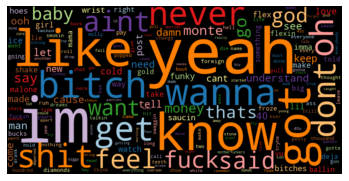

In [403]:
wordcloud(Counter(postmalone_lyrics_list))

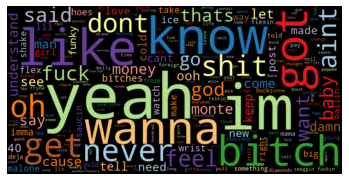

In [404]:
wordcloud(Counter(postmalone_lyrics_list))

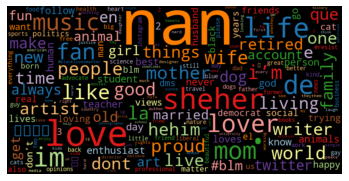

In [406]:
wordcloud(Counter(postmalone_desc_list))

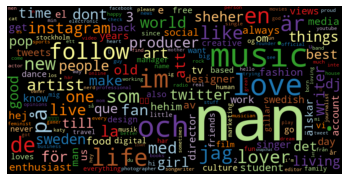

In [405]:
wordcloud(Counter(joji_desc_list))

In [408]:
count_words(lyrics_data[lyrics_data['artists'] == 'PostMalone'])

,freq
token,
yeah,139
im,137
know,86
like,85
got,72
...,...
whatever,2
dot,2
ts,2


In [409]:
count_words(lyrics_data[lyrics_data['artists'] == 'Joji'])

,freq
token,
dont,87
yeah,62
know,49
im,43
fun,39
...,...
soul,2
shell,2
read,2


In [410]:
count_words(twitter_data[twitter_data['artist'] == 'postmalone'])

,freq
token,
nan,36520
love,4599
sheher,2898
life,2706
im,2492
...,...
laff,2
inequalities,2
experta,2


In [411]:
count_words(twitter_data[twitter_data['artist'] == 'joji'])

,freq
token,
nan,61128
music,2919
love,2217
och,2162
im,1612
...,...
blooming,2
limo,2
veni,2


Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: It's interesting to visualize the words and highlight the high frequency words. In the lyrics, seems it's common for musicans to have words like "yeah", "know", "wanna", etc. For follower descrption, the words are more diverse, but still can see some common ones like "love", "music", "life", etc.

---